In [3]:
import pandas as pd
import gensim
import gensim.downloader as api
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [6]:
# Load dataset
df = pd.read_csv('/kaggle/input/emotion-detection-from-text/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [13]:
df.shape

(40000, 4)

In [8]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing
df['processed_text'] = df['content'].apply(preprocess_text)

In [12]:
df['processed_text'][1]

['layin', 'n', 'bed', 'headache', 'ughhhh', '...', 'waitin', 'call', '...']

In [26]:
model = gensim.models.Word2Vec(sentences=df['processed_text'], vector_size=150, window=10, min_count=2, workers=4)


In [27]:
model.wv.most_similar('good')

[('great', 0.9626678824424744),
 ('nice', 0.9513335824012756),
 ('shattered', 0.9439369440078735),
 ('bad', 0.9421512484550476),
 ('rough', 0.9410436749458313),
 ('enjoy', 0.9356687664985657),
 ('ish', 0.9347800016403198),
 ('everyone', 0.9347080588340759),
 ('stressful', 0.9340019822120667),
 ('friday', 0.9315364360809326)]

In [28]:
print(model.wv.similarity('happy', 'joy'))
print(model.wv.similarity('sad', 'angry'))


0.82459295
0.9447665


In [33]:
model.wv.similarity('man','woman')

0.9880251

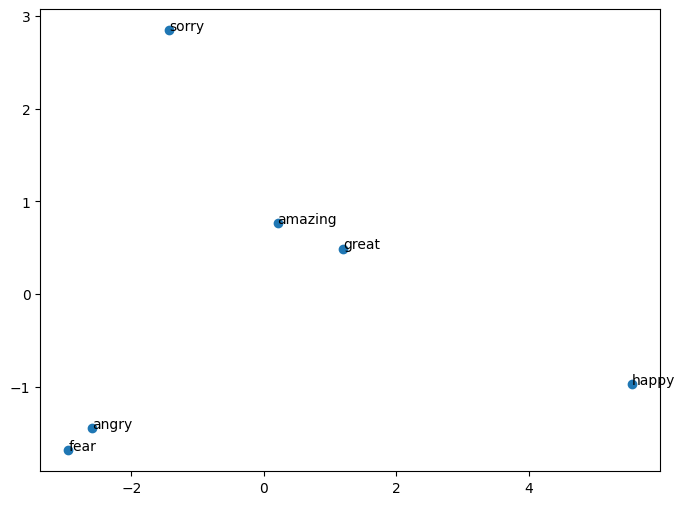

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['happy', 'sorry', 'great', 'angry', 'amazing', 'fear']
word_vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], marker='o')

for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]))

plt.show()
